In [1]:
import pandas as pd
import numpy as np
import re
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
df = pd.read_csv('../sfdat28-schott_work/2004_businesses.csv')
df.head()

,success_rate,company_name,address,city,state,zip,latitude,longitude,employee_count,sales,sic_code,sic_description,naics_code,naics_description,credit_rating,credit_score,home_business,year_est,sq_footage,pc_count
0,1,Deposition Sciences Inc,3300 Coffey Ln,Santa Rosa,CA,95403,38.470623,-122.744092,100.0,$0,3851-03,Optical Goods-Manufacturers,33911505,Ophthalmic Goods Manufacturing,A+,98,No,2004,"40,000+",NaN
1,0,Pac Lease,7667 Conde Ln,Windsor,CA,95492,38.533784,-122.799052,50.0,"$19,200,000",7513-03,Truck Renting & Leasing,53212016,"Truck, Utility Trailer & Rv Rental & Leasing",B,83,No,2004,"10,000 - 39,999",2 - 9 Pcs
2,1,Hydrofarm Inc,2249 S Mcdowell Boulevard Ext,Petaluma,CA,94954,38.231476,-122.590557,60.0,"$10,680,000",0182-02,Hydroponics,11141902,Other Food Crops Grown Under Cover,A,93,No,2004,"40,000+",2 - 9 Pcs
3,0,KAISERQUOTES.COM,750 Mendocino Ave # 4,Santa Rosa,CA,95401,38.447095,-122.717143,6.0,"$7,128,000",6324-04,Health Plans,52411402,Direct Health & Medical Insurance Carriers,B,81,No,2004,"10,000 - 39,999",2 - 9 Pcs
4,1,Feast Catering Business Office,3100 Dutton Ave # 132,Santa Rosa,CA,95407,38.401095,-122.722126,150.0,"$6,000,000",5812-12,Caterers,72232001,Caterers,B+,89,No,2004,"2,500 - 9,999",NaN


In [3]:
df.shape

(160, 20)

In [4]:
df.isnull().sum()

success_rate         0
company_name         0
address              0
city                 0
state                0
zip                  0
latitude             0
longitude            0
employee_count       1
sales                0
sic_code             0
sic_description      0
naics_code           0
naics_description    0
credit_rating        0
credit_score         0
home_business        0
year_est             0
sq_footage           0
pc_count             4
dtype: int64

In [5]:
df.columns

Index([u'success_rate', u'company_name', u'address', u'city', u'state', u'zip',
       u'latitude', u'longitude', u'employee_count', u'sales', u'sic_code',
       u'sic_description', u'naics_code', u'naics_description',
       u'credit_rating', u'credit_score', u'home_business', u'year_est',
       u'sq_footage', u'pc_count'],
      dtype='object')

In [6]:
df.naics_code.value_counts().head()

81211202    6
53121003    5
72251117    4
56174001    3
52421001    3
Name: naics_code, dtype: int64

Axes(0.125,0.125;0.775x0.775)


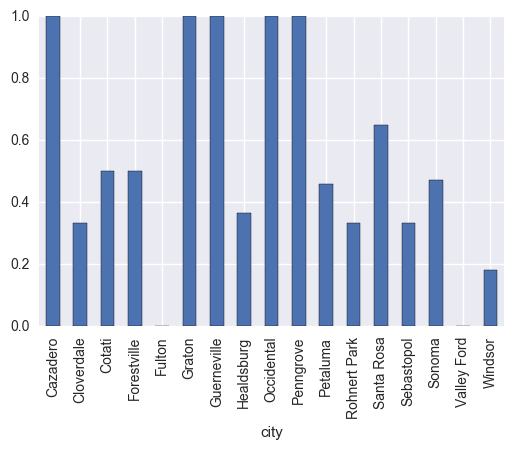

In [7]:
print df.groupby('city').success_rate.mean().plot(kind='bar')

Axes(0.125,0.125;0.775x0.775)


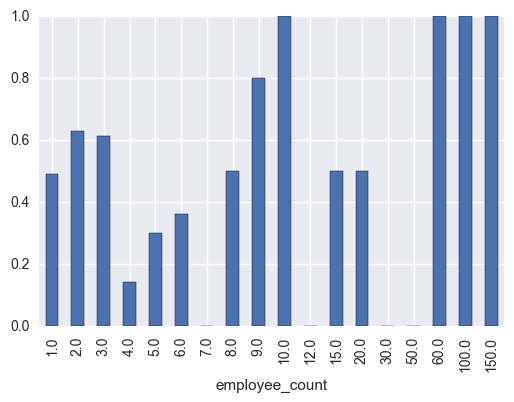

In [8]:
print df.groupby('employee_count').success_rate.mean().plot(kind='bar')

In [9]:
df.credit_score.describe()

count    160.000000
mean      77.962500
std       14.929136
min        0.000000
25%       77.000000
50%       79.000000
75%       82.250000
max      100.000000
Name: credit_score, dtype: float64

Axes(0.125,0.125;0.775x0.775)


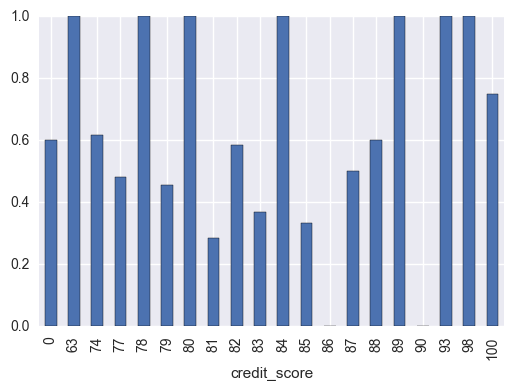

In [10]:
print df.groupby('credit_score').success_rate.mean().plot(kind='bar')

(70, 95)

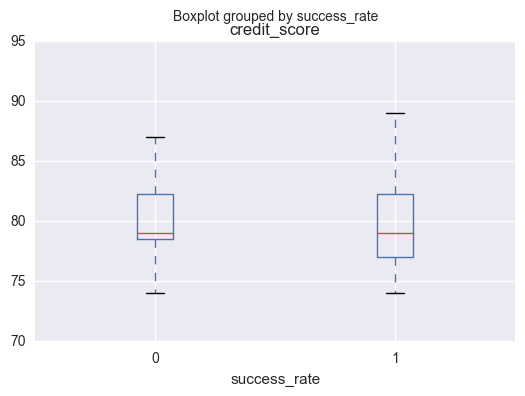

In [11]:
df.boxplot(column='credit_score', by='success_rate')
plt.ylim(70, 95)

In [12]:
df.groupby('naics_code').success_rate.agg(['count', 'mean']).sort('count')

/Users/FrancescaSchott/anaconda/envs/testenv/lib/python2.7/site-packages/ipykernel/__main__.py:1: FutureWarning: sort(columns=....) is deprecated, use sort_values(by=.....)
  if __name__ == '__main__':


,count,mean
naics_code,,
99999004,1,1.000000
54121101,1,0.000000
54119905,1,1.000000
54112001,1,0.000000
53212016,1,0.000000
72251502,1,1.000000
53112004,1,0.000000
81131027,1,0.000000
81149058,1,0.000000


In [13]:
print df.groupby('naics_code').success_rate.mean()

naics_code
11133201    0.000000
11141902    1.000000
11199803    0.000000
11291001    1.000000
11299013    1.000000
23611505    0.000000
23611823    1.000000
23731004    1.000000
23799012    0.000000
23821024    0.000000
23822025    1.000000
23831009    1.000000
23835013    1.000000
23891006    1.000000
31213001    1.000000
31412004    1.000000
32311109    1.000000
32311164    0.000000
33231210    0.000000
33271002    0.000000
33361109    1.000000
33911505    1.000000
33991006    0.000000
33995009    1.000000
33999936    1.000000
42331029    0.000000
42372032    0.000000
42392023    1.000000
42399019    1.000000
42499050    0.000000
              ...   
61161005    0.000000
61162014    0.500000
61169102    1.000000
61171003    0.000000
61171012    1.000000
62121003    0.000000
62139901    1.000000
62139936    1.000000
62149301    1.000000
71399031    1.000000
71399050    0.000000
72111002    1.000000
72119101    1.000000
72232001    1.000000
72251117    0.000000
72251502    1.000000
81

In [14]:
print df.home_business.value_counts()

No     106
Yes     54
Name: home_business, dtype: int64


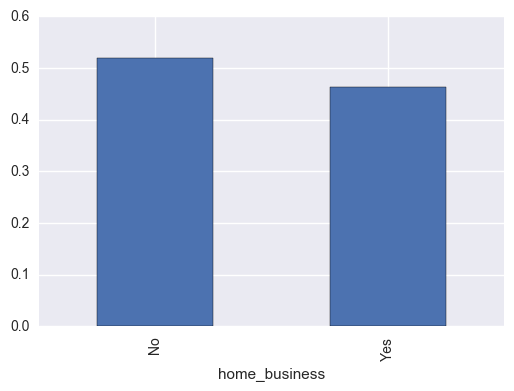

In [15]:
df.groupby('home_business').success_rate.mean().plot(kind='bar')

(70, 95)

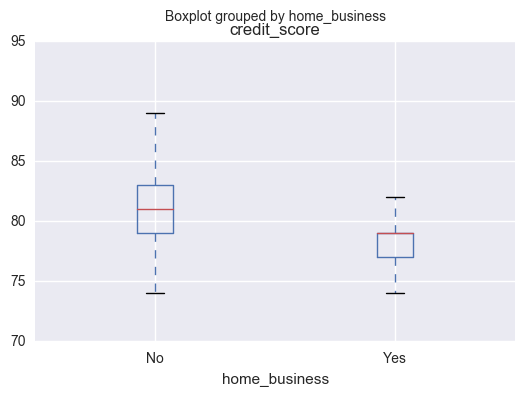

In [16]:
df.boxplot(column='credit_score', by='home_business')
plt.ylim(70, 95)

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x11799d510>,
        <matplotlib.axes._subplots.AxesSubplot object at 0x117d37810>]], dtype=object)

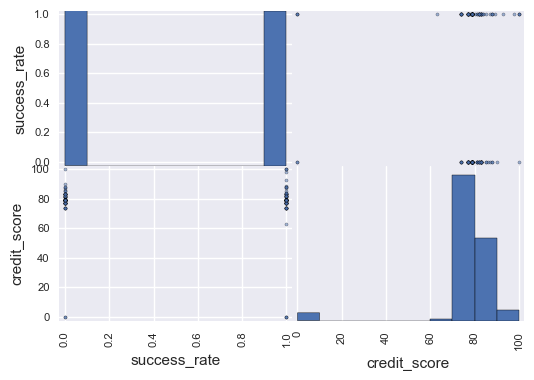

In [17]:
df_3 = df[['success_rate', 'credit_score', 'home_business']]

pd.scatter_matrix(df_3)

In [18]:
df1 = df[['success_rate', 'city', 'employee_count']]
df1.head()

,success_rate,city,employee_count
0,1,Santa Rosa,100.0
1,0,Windsor,50.0
2,1,Petaluma,60.0
3,0,Santa Rosa,6.0
4,1,Santa Rosa,150.0


In [19]:
df1.city.value_counts()

Santa Rosa      54
Petaluma        24
Sonoma          17
Rohnert Park    15
Healdsburg      11
Windsor         11
Sebastopol       9
Cotati           4
Cloverdale       3
Penngrove        3
Guerneville      2
Forestville      2
Fulton           1
Valley Ford      1
Occidental       1
Cazadero         1
Graton           1
Name: city, dtype: int64

In [24]:
df1.employee_count.value_counts()

1.0      67
2.0      27
3.0      13
6.0      11
5.0      10
4.0       7
20.0      6
9.0       5
8.0       2
7.0       2
15.0      2
10.0      1
100.0     1
12.0      1
30.0      1
50.0      1
60.0      1
150.0     1
Name: employee_count, dtype: int64

In [20]:
print df1[df1.city=='Guerneville']

    success_rate         city  employee_count
15             1  Guerneville            20.0
66             1  Guerneville             2.0


In [21]:
print df[df.city=='Guerneville']

    success_rate                   company_name           address  \
15             1       Russian River Health Ctr      16319 3rd St   
66             1  Twilight Studio Stained Glass  14700 Orchard Ln   

           city state    zip   latitude   longitude  employee_count  \
15  Guerneville    CA  95446  38.500929 -122.989196            20.0   
66  Guerneville    CA  95446  38.516900 -122.974354             2.0   

          sales sic_code         sic_description  naics_code  \
15  $2,420,000   8049-22           Psychologists    62139936   
66    $402,000   5231-03  Glass-Stained & Leaded    44419034   

                                 naics_description credit_rating  \
15  Offices Of All Other Misc Health Practitioners            B+   
66                 Other Building Material Dealers            C+   

    credit_score home_business  year_est     sq_footage     pc_count  
15            87            No      2004  2,500 - 9,999  10 - 29 Pcs  
66            79           Yes      20

In [22]:
df_santa_rosa = df[df.city=='Santa Rosa']

In [23]:
df_santa_rosa.head()

,success_rate,company_name,address,city,state,zip,latitude,longitude,employee_count,sales,sic_code,sic_description,naics_code,naics_description,credit_rating,credit_score,home_business,year_est,sq_footage,pc_count
0,1,Deposition Sciences Inc,3300 Coffey Ln,Santa Rosa,CA,95403,38.470623,-122.744092,100.0,$0,3851-03,Optical Goods-Manufacturers,33911505,Ophthalmic Goods Manufacturing,A+,98,No,2004,"40,000+",NaN
3,0,KAISERQUOTES.COM,750 Mendocino Ave # 4,Santa Rosa,CA,95401,38.447095,-122.717143,6.0,"$7,128,000",6324-04,Health Plans,52411402,Direct Health & Medical Insurance Carriers,B,81,No,2004,"10,000 - 39,999",2 - 9 Pcs
4,1,Feast Catering Business Office,3100 Dutton Ave # 132,Santa Rosa,CA,95407,38.401095,-122.722126,150.0,"$6,000,000",5812-12,Caterers,72232001,Caterers,B+,89,No,2004,"2,500 - 9,999",NaN
6,0,Western Dental Ctr,4100 Montgomery Dr # A,Santa Rosa,CA,95405,38.454166,-122.672014,30.0,"$4,350,000",8021-01,Dentists,62121003,Offices Of Dentists,A+,100,No,2004,"2,500 - 9,999",2 - 9 Pcs
8,1,California Mortgage Consultant,3033 Cleveland Ave # 150,Santa Rosa,CA,95403,38.466799,-122.729384,20.0,"$3,980,000",6162-01,Real Estate Loans,52229202,Real Estate Credit,B,82,No,2004,"2,500 - 9,999",10 - 29 Pcs


In [26]:
df_santa_rosa.sales.replace('[\$,]', '', inplace=True)
df_santa_rosa.head()

/Users/FrancescaSchott/anaconda/envs/testenv/lib/python2.7/site-packages/pandas/core/generic.py:3443: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._update_inplace(new_data)


,success_rate,company_name,address,city,state,zip,latitude,longitude,employee_count,sales,sic_code,sic_description,naics_code,naics_description,credit_rating,credit_score,home_business,year_est,sq_footage,pc_count
0,1,Deposition Sciences Inc,3300 Coffey Ln,Santa Rosa,CA,95403,38.470623,-122.744092,100.0,$0,3851-03,Optical Goods-Manufacturers,33911505,Ophthalmic Goods Manufacturing,A+,98,No,2004,"40,000+",NaN
3,0,KAISERQUOTES.COM,750 Mendocino Ave # 4,Santa Rosa,CA,95401,38.447095,-122.717143,6.0,"$7,128,000",6324-04,Health Plans,52411402,Direct Health & Medical Insurance Carriers,B,81,No,2004,"10,000 - 39,999",2 - 9 Pcs
4,1,Feast Catering Business Office,3100 Dutton Ave # 132,Santa Rosa,CA,95407,38.401095,-122.722126,150.0,"$6,000,000",5812-12,Caterers,72232001,Caterers,B+,89,No,2004,"2,500 - 9,999",NaN
6,0,Western Dental Ctr,4100 Montgomery Dr # A,Santa Rosa,CA,95405,38.454166,-122.672014,30.0,"$4,350,000",8021-01,Dentists,62121003,Offices Of Dentists,A+,100,No,2004,"2,500 - 9,999",2 - 9 Pcs
8,1,California Mortgage Consultant,3033 Cleveland Ave # 150,Santa Rosa,CA,95403,38.466799,-122.729384,20.0,"$3,980,000",6162-01,Real Estate Loans,52229202,Real Estate Credit,B,82,No,2004,"2,500 - 9,999",10 - 29 Pcs


In [26]:

##print df_santa_rosa.employee_count.mean()
##print df_santa_rosa.sales.mean()
##print df_santa_rosa.credit_score.mean()

df_santa_rosa.zip.value_counts()


95403    12
95407    11
95401    11
95409     9
95404     8
95405     3
Name: zip, dtype: int64